# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-z3aXdGoLSgWL3LN2Vaf6TP&si=p804FxQaY35Z4cIo >}}

# 2. Imports

In [4]:
#!pip install autogluon.eda

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [7]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 4. 적합 

In [8]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label='charges')
# step3 
predictr.fit(df_train)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_114515/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_114515/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.33 GB / 490.57 GB (50.6%)
Train Data Rows:    1338
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (63770.42801, 1121.8739, 13270.42227, 12110.01124)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...


# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
charges,1338,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801,float64,1337,,,float,


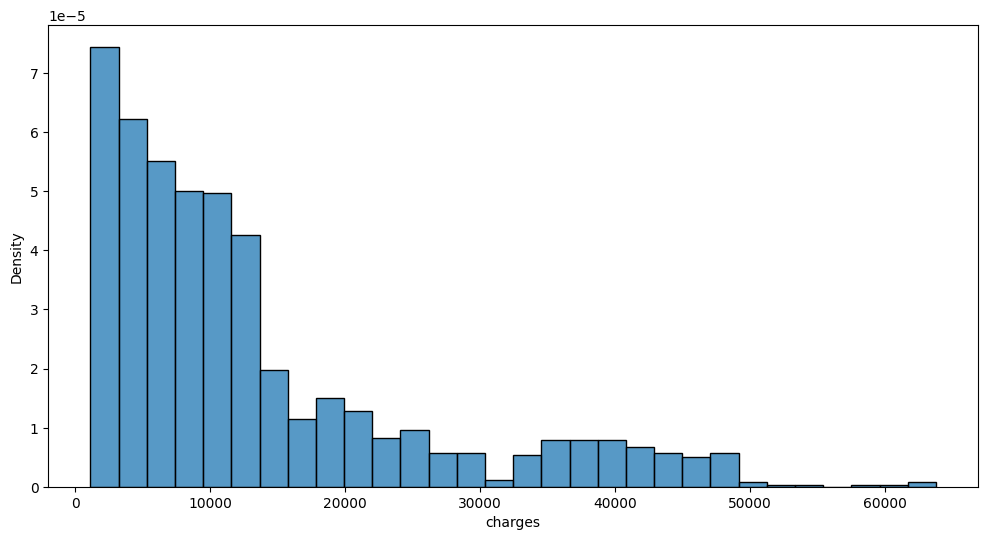

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `charges` >= `0.5`**

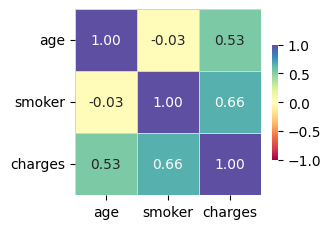

**Feature interaction between `smoker`/`charges` in `train_data`**

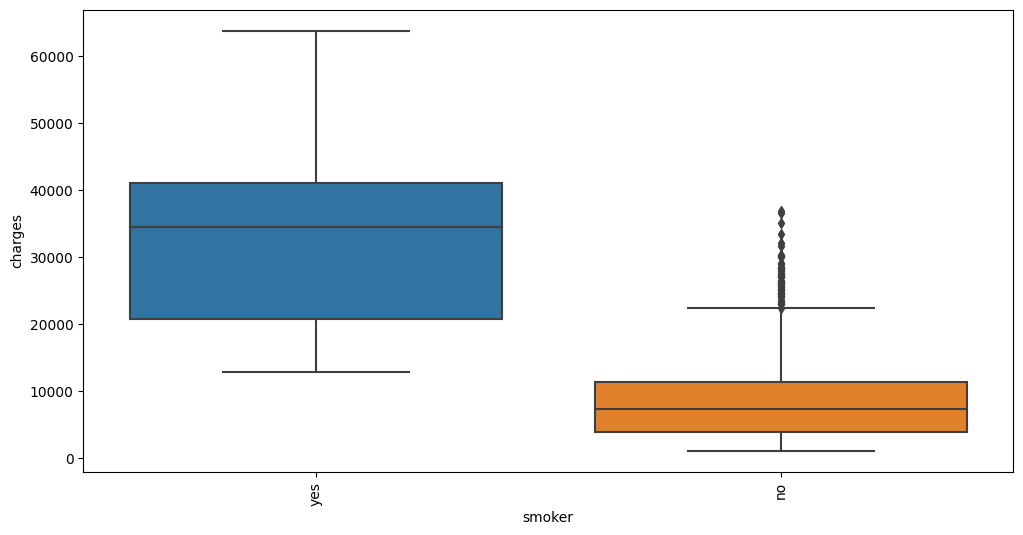

**Feature interaction between `age`/`charges` in `train_data`**

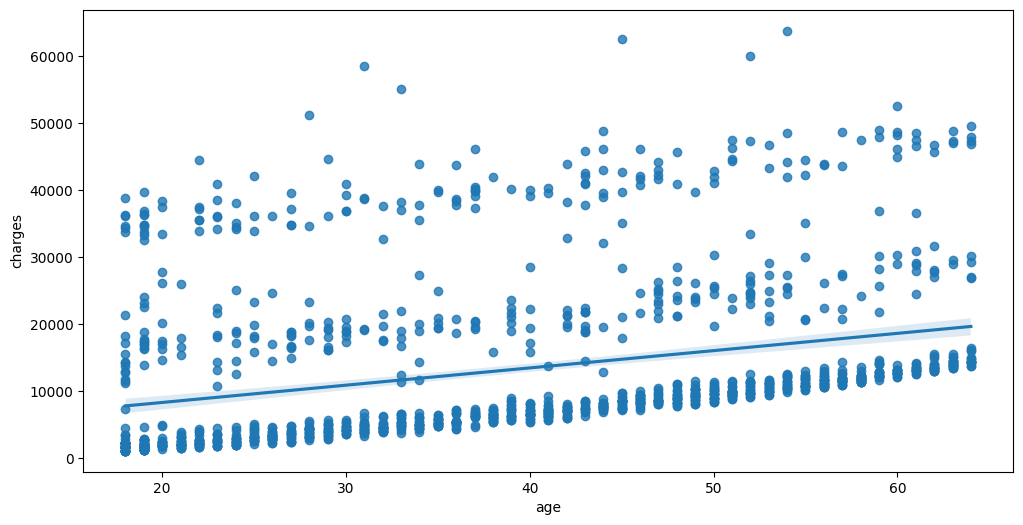

In [9]:
auto.target_analysis(
    train_data=df_train,
    label='charges',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_114747/"


### Model Prediction for charges

Using validation data for `Test` points

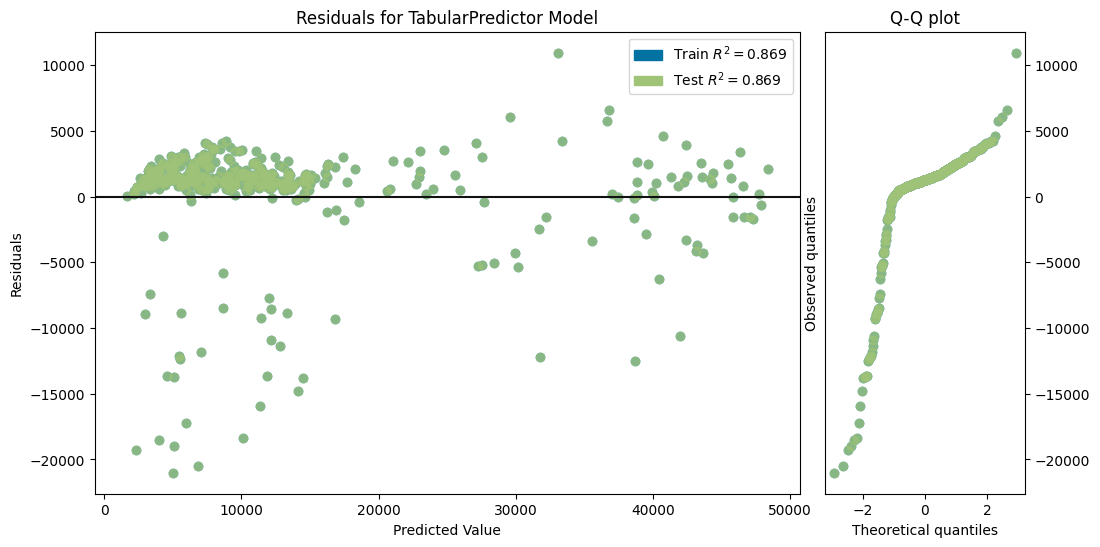

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-4250.255585,-4759.009823,0.002129,0.00197,0.186022,0.002129,0.00197,0.186022,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
smoker,11076.822803,324.831922,8.864565e-08,5,11745.656221,10407.989386
bmi,3192.326797,150.875820,5.969502e-07,5,3502.982196,2881.671399
age,2328.261296,82.062303,1.848886e-07,5,2497.228712,2159.293881
children,77.495531,20.011431,4.892476e-04,5,118.699345,36.291717
region,39.652780,26.510840,1.435724e-02,5,94.238965,-14.933406
sex,-21.116027,18.796163,9.670434e-01,5,17.585533,-59.817587


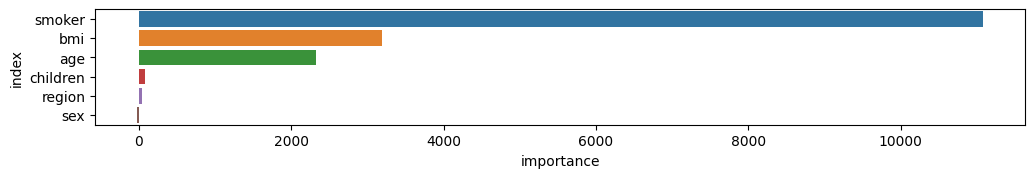

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,age,sex,bmi,children,smoker,region,charges,charges_pred,error
1019,21,female,32.680,2,no,northwest,26018.95052,5010.268555,21008.681965
140,34,male,22.420,2,no,northeast,27375.90478,6853.432129,20522.472651
1027,23,male,18.715,0,no,northwest,21595.38229,2316.816650,19278.565640
526,19,female,30.590,2,no,northwest,24059.68019,5120.955078,18938.725112
1039,19,male,27.265,2,no,northwest,22493.65964,4008.429199,18485.230441
959,48,male,36.670,1,no,northwest,28468.91901,10121.377930,18347.541080
1008,25,male,24.985,2,no,northeast,23241.47453,5985.646484,17255.828046
539,53,male,31.350,0,no,southeast,27346.04207,11388.868164,15957.173906
9,60,female,25.840,0,no,northwest,28923.13692,14113.998047,14809.138873
443,59,female,36.520,1,no,southeast,28287.89766,14497.187500,13790.710160


In [11]:
auto.quick_fit(
    train_data=df_train,
    label='charges',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

`-` 1번째 관측치 

In [23]:
df_train.iloc[[1]]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523


In [24]:
predictr.predict(df_train.iloc[[1]])

1    4022.69458
Name: charges, dtype: float32

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523


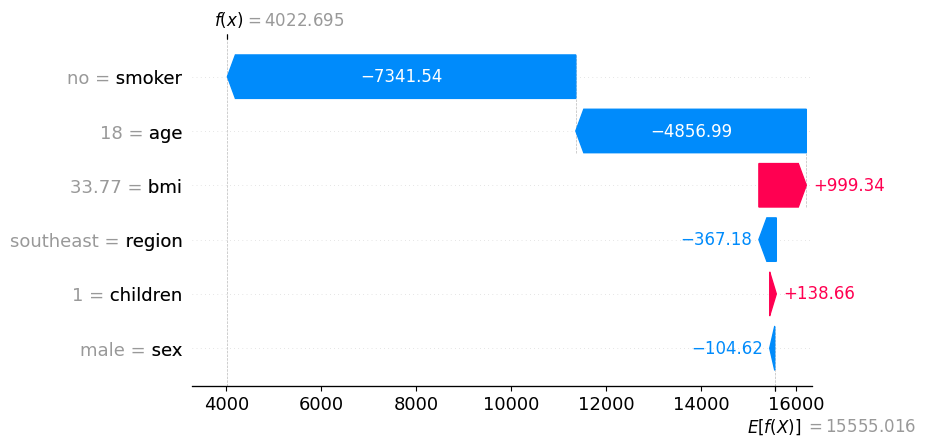

In [25]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]],
    display_rows=True,
    plot='waterfall'
)

`-` 6번째 관측치 

In [20]:
df_train.iloc[[6]]

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.44,1,no,southeast,8240.5896


In [21]:
predictr.predict(df_train.iloc[[6]])

6    9298.430664
Name: charges, dtype: float32

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.44,1,no,southeast,8240.5896


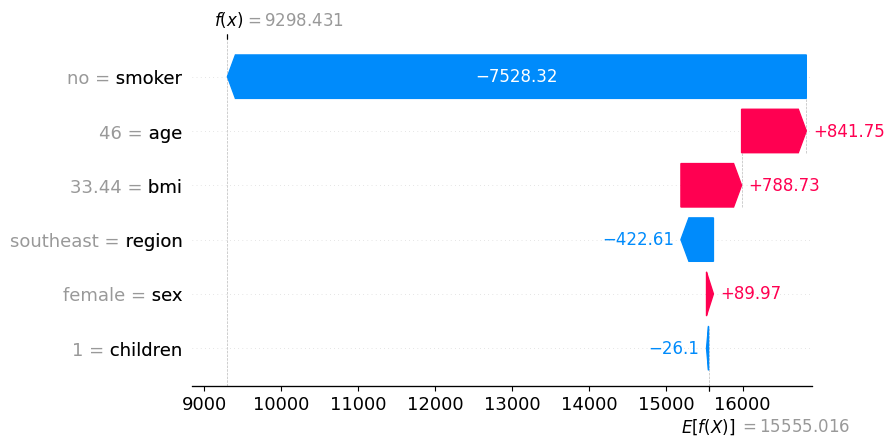

In [22]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[6]],
    display_rows=True,
    plot='waterfall'
)